In [51]:
# Import packages
using Revise
using HistoryStacks
using OrdinaryDiffEq
using Plots
default(grid=false,framestyle=:box,fontfamily="Computer Modern",label="",lw=2,palette=:tab10,labelfontsize=16, tickfontsize=12,legendfontsize=12)

In [52]:
# Simple linear system to get trajectory data
F(x) = [x[1] x[2] 0.0 0.0; 0.0 0.0 x[1] x[2]] # Regressor
θ = [-0.3, -1.0, 1.0, -0.5] # Parameters
f(x) = F(x)*θ # Vector field

f (generic function with 1 method)

In [53]:
# Solve ODE
x0 = [-1.0, 1.0]
T = 20.0
sol = solve(ODEProblem((x,p,t) -> f(x), x0, (0,T)), Tsit5()); # Supress outout

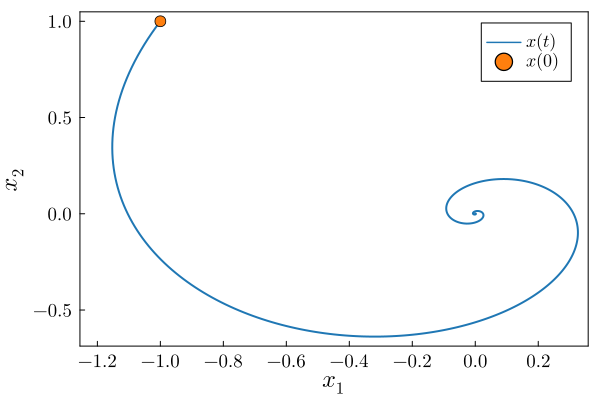

In [54]:
# Take a look at the resulting phase portraint
plot(sol, idxs=(1,2), xlabel=raw"$x_1$", ylabel=raw"$x_2$", label=raw"$x(t)$")
scatter!([x0[1]], [x0[2]], label=raw"$x(0)$", ms=6)

In [55]:
# Set up a random history stack 
M = 20      
δ = 0.1 
H = HistoryStack(M, δ)

HistoryStack(Any[], Any[], 20, 0.1)

In [56]:
# Recursively estimate parameters from trajectory data
dt = 0.05 # Timestep
tspan = 0.0:dt:T
θ̂₀ = rand(-2:0.01:2, 4) # Initial parameter guess
θ̂s = [θ̂₀]
for (i, t) in enumerate(tspan)
    x = sol(t)
    regressor = F(x)
    target = f(x)
    update!(H, regressor, target)

    # Update parameters
    θ̂ = θ̂s[i]
    push!(θ̂s, θ̂ + dt*HistoryStacks.gradient_vector_field(H, θ̂))
end
θ̂ = θ̂s[end]

4-element Vector{Float64}:
 -0.3000000000000001
 -1.0000000000000007
  1.0
 -0.5000000000000003

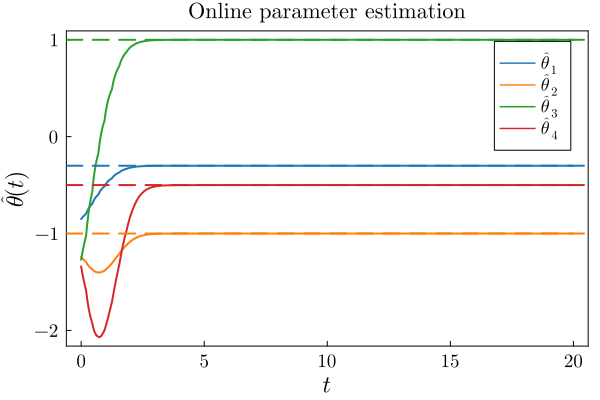

In [57]:
# Take a look at our parameter estimates
θ̂1 = [θ[1] for θ in θ̂s]
θ̂2 = [θ[2] for θ in θ̂s]
θ̂3 = [θ[3] for θ in θ̂s]
θ̂4 = [θ[4] for θ in θ̂s]

plot(xlabel=raw"$t$", ylabel=raw"$\hat{\theta}(t)$", title="Online parameter estimation")
plot!(tspan, θ̂1[1:end-1], label=raw"$\hat{\theta}_1$")
plot!(tspan, θ̂2[1:end-1], label=raw"$\hat{\theta}_2$")
plot!(tspan, θ̂3[1:end-1], label=raw"$\hat{\theta}_3$")
plot!(tspan, θ̂4[1:end-1], label=raw"$\hat{\theta}_4$")
hline!([θ[1]], ls=:dash, c=1)
hline!([θ[2]], ls=:dash, c=2)
hline!([θ[3]], ls=:dash, c=3)
hline!([θ[4]], ls=:dash, c=4)

In [58]:
# Recursively estimate parameters from noisy trajectory data
H = HistoryStack(M, δ)
dt = 0.05 # Timestep
tspan = 0.0:dt:T
θ̂₀ = rand(-2:0.01:2, 4) # Initial parameter guess
θ̂s = [θ̂₀]
for (i, t) in enumerate(tspan)
    x = sol(t)
    regressor = F(x)
    target = f(x) + 0.2*rand(-1:0.01:1, 2)
    update!(H, regressor, target)

    # Update parameters
    θ̂ = θ̂s[i]
    push!(θ̂s, θ̂ + dt*HistoryStacks.gradient_vector_field(H, θ̂))
end
θ̂ = θ̂s[end]

4-element Vector{Float64}:
 -0.2554146140350324
 -0.955211983309563
  1.0079675037413778
 -0.5465911142169454

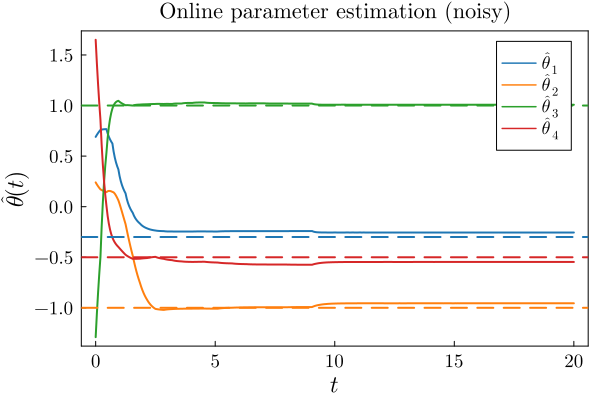

In [59]:
# Take a look at our parameter estimates
θ̂1 = [θ[1] for θ in θ̂s]
θ̂2 = [θ[2] for θ in θ̂s]
θ̂3 = [θ[3] for θ in θ̂s]
θ̂4 = [θ[4] for θ in θ̂s]

plot(xlabel=raw"$t$", ylabel=raw"$\hat{\theta}(t)$", title="Online parameter estimation (noisy)")
plot!(tspan, θ̂1[1:end-1], label=raw"$\hat{\theta}_1$")
plot!(tspan, θ̂2[1:end-1], label=raw"$\hat{\theta}_2$")
plot!(tspan, θ̂3[1:end-1], label=raw"$\hat{\theta}_3$")
plot!(tspan, θ̂4[1:end-1], label=raw"$\hat{\theta}_4$")
hline!([θ[1]], ls=:dash, c=1)
hline!([θ[2]], ls=:dash, c=2)
hline!([θ[3]], ls=:dash, c=3)
hline!([θ[4]], ls=:dash, c=4)